# HW3 Classifying Customer Complaints
## Xin Qiu   Andrew ID: xq

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
file = "Consumer_Complaints.csv"
df = pd.read_csv(file)
# Discard the rows where consumer complaint narrative is blank
df = df[df['Consumer complaint narrative'].notnull()]
df.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
1,10/01/2016,Credit reporting,NaN,Incorrect information on credit report,Account status,I have outdated information on my credit repor...,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",AL,352XX,NaN,Consent provided,Web,10/05/2016,Closed with explanation,Yes,No,2141773
2,10/17/2016,Consumer Loan,Vehicle loan,Managing the loan or lease,NaN,I purchased a new car on XXXX XXXX. The car de...,NaN,"CITIZENS FINANCIAL GROUP, INC.",PA,177XX,Older American,Consent provided,Web,10/20/2016,Closed with explanation,Yes,No,2163100
7,06/15/2015,Credit reporting,NaN,Credit reporting company's investigation,Inadequate help over the phone,An account on my credit report has a mistaken ...,Company chooses not to provide a public response,Experian Information Solutions Inc.,VA,224XX,NaN,Consent provided,Web,06/15/2015,Closed with explanation,Yes,No,1420702
12,02/03/2016,Debt collection,"Other (i.e. phone, health club, etc.)",Disclosure verification of debt,Not given enough info to verify debt,This company refuses to provide me verificatio...,NaN,"The CBE Group, Inc.",TX,752XX,NaN,Consent provided,Web,02/03/2016,Closed with explanation,Yes,Yes,1772196
16,02/17/2016,Debt collection,Credit card,Improper contact or sharing of info,Talked to a third party about my debt,This complaint is in regards to Square Two Fin...,Company has responded to the consumer and the ...,SQUARETWO FINANCIAL CORPORATION,NE,693XX,NaN,Consent provided,Web,03/04/2016,Closed with explanation,Yes,Yes,1790634


In [2]:
# This yields 273739 rows.
print(len(df))

273739


## Entity Extraction

In [3]:
# entity extraction
import pandas as pd
import nltk,re,pprint
import matplotlib.pyplot as plt

def preprocess_complaint_narratives(df):
    sentences = []
    for doc in df:
        #Sentence tokenize
        sent = nltk.sent_tokenize(doc)
        #word tokenize
        sent = [nltk.word_tokenize(s) for s in sent]
        #Part of speech tagging
        sent = [nltk.pos_tag(s) for s in sent]
        for s in sent:
            sentences.append(s)
    return sentences

compNarr = df['Consumer complaint narrative']
tokens = preprocess_complaint_narratives(compNarr)
tree = [nltk.chunk.ne_chunk(t) for t in tokens]

def extract_entity_names(t):
    entity_names = []
    if hasattr(t, 'label') and t.label():
        if t.label() == 'ORGANIZATION':
            entity_names.append(' '.join([child[0] for child in t]))
        else:
            for child in t:
                entity_names.extend(extract_entity_names(child))
    return entity_names

entity_names = []
for t in tree:
    entity_names.extend(extract_entity_names(t))
    
# Get unique entity names
counts={}
for i in entity_names:
    if(i in counts):
        counts[i] +=1
    else:
        counts[i] = 1

In [7]:
# check which banks are mentioned most (within top 200 range)
# Because the organization tag isn't perfect, we have to manually identify the actual banks.
sort_counts = sorted(counts.items(), key=lambda x: x[1], reverse=True)
sort_counts[0:200]

[('XXXX', 1255563),
 ('Bank', 23121),
 ('CFPB', 14911),
 ('FCRA', 14306),
 ('Equifax', 11145),
 ('THE', 10409),
 ('NOT', 9123),
 ('CREDIT', 8051),
 ('TransUnion', 7055),
 ('Citibank', 6459),
 ('Navient', 6423),
 ('Fair Credit', 6381),
 ('Credit', 6019),
 ('FDCPA', 5590),
 ('Nationstar', 5574),
 ('Capital One', 5337),
 ('BOA', 5032),
 ('Transunion', 4991),
 ('USAA', 4494),
 ('US Bank', 4425),
 ('PNC', 4170),
 ('XXXX Bank', 4153),
 ('NO', 4079),
 ('FTC', 3876),
 ('PayPal', 3792),
 ('Consumer', 3727),
 ('SPS', 3477),
 ('PMI', 3434),
 ('LLC', 3417),
 ('ATM', 3226),
 ('Social', 3128),
 ('IRS', 2994),
 ('Fair Debt Collection', 2981),
 ('SLS', 2959),
 ('American Express', 2924),
 ('BANK', 2874),
 ('AND', 2832),
 ('CA', 2766),
 ('XXXX of', 2529),
 ('FL', 2499),
 ('FHA', 2486),
 ('HAMP', 2467),
 ('TO', 2408),
 ('THIS', 2284),
 ('ALL', 2275),
 ('BofA', 2246),
 ('OCWEN', 2084),
 ('SSN', 2064),
 ('ACCOUNT', 2015),
 ('XXXX XXXX', 2014),
 ('CRA', 1987),
 ('TX', 1927),
 ('VA', 1904),
 ('HSBC', 1886),

In [10]:
# After identify the actual banks, add actual banks to a new list (show only the first 13 banks)
# Note: Still, it isn't perfect because some banks may have more than one names and are counted separately. (like 'PNC' and 'PNC bank')
banksortcounts = list()
banksortcounts.append(sort_counts[9])
banksortcounts.append(sort_counts[16])
banksortcounts.append(sort_counts[20])
banksortcounts.append(sort_counts[34])
banksortcounts.append(sort_counts[53])
banksortcounts.append(sort_counts[65])
banksortcounts.append(sort_counts[76])
banksortcounts.append(sort_counts[79])
banksortcounts.append(sort_counts[102])
banksortcounts.append(sort_counts[127])
banksortcounts.append(sort_counts[152])
banksortcounts.append(sort_counts[153])
banksortcounts.append(sort_counts[162])
banksortcounts

[('Citibank', 6459),
 ('BOA', 5032),
 ('PNC', 4170),
 ('American Express', 2924),
 ('HSBC', 1886),
 ('TD Bank', 1669),
 ('SunTrust', 1405),
 ('Wells Fargo', 1348),
 ('Synchrony Bank', 1131),
 ('JP Morgan', 915),
 ('Citizens Bank', 757),
 ('Chase', 746),
 ('Discover', 713)]

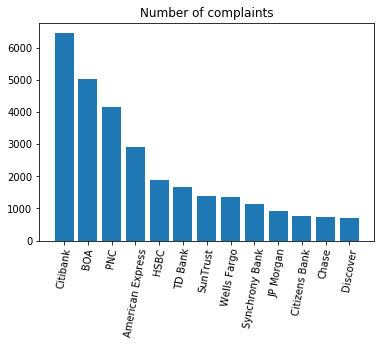

In [11]:
# Draw a histogram of number of complaints by bank name (show only top 13).
bankcounts = pd.DataFrame(data = banksortcounts, columns = ['Bank', 'Counts'])
bankcounts.set_index('Bank', inplace = True)
bankdict = bankcounts.to_dict()['Counts']
plt.title("Number of complaints")
plt.bar(range(len(bankdict)), bankdict.values(), align='center')
plt.xticks(range(len(bankdict)), bankdict.keys(), rotation = 80)
plt.show()

### What can you conclude about which banks are causing the most complaints?

Citibank, BOA, PNC, American Express, HSBC, TD Bank, SunTrust, Wells Fargo, Synchrony Bank, JP Morgan, Citizens Bank, Chase and Discover are causing the most complaints.

## Product Prediction

In [21]:
# Create a model to predict the product based on the consumer complaint narrative. 
import pandas as pd
import nltk
import random
from nltk.corpus import stopwords
import numpy as np
from sklearn.linear_model import LogisticRegression

stop_words = set(stopwords.words('english'))
feature_words = set()

# Generates feature vectors for each input x, in an array of shape (len(feature_words),1) - here (63,1)
def issue_features(doc):
	global feature_words
	features = {}
	words = []
	feat = np.zeros(len(feature_words))
	for s in doc.lower().split():
		words.append(s)

	for word in set(words):
		if(word in feature_words):
			feat[feature_words.index(word)] = 1
	return feat


# Generates product labels for each output label y, in an array of shape (len(labels),1)
def product_label(p):
	global labels
	pf = np.zeros(len(labels))
	pf[labels.index(p)] = 1
	return pf


x = df['Consumer complaint narrative']
y = df['Product']

#Get all the unique product labels
labels = list(df.Product.unique())

top = {}
print("Getting feature list")
for label in labels:
	temp = df[df['Product']==label]['Consumer complaint narrative']
	wordc = {}
	filtered = []
	for doc in temp:
		for s in doc.lower().split():
			#Use s only if s is not a stop word
			if(s not in stop_words):
				filtered.append(s)
				if(s in wordc):
					wordc[s] +=1
				else:
					wordc[s] = 1
	topwords = sorted(wordc.items(),key = lambda x:x[1],reverse=True)

	#Get only the top 50 words for each label
	top[label] = topwords[0:50]

occ = {}
for key,val in top.items():
	for w in val:
		if(w[0] in occ):
			occ[w[0]] += w[1]
		else:
			occ[w[0]] = w[1]
		feature_words.add(w[0])

#Feature words are the top 50 occurring words in each label category. We consider all the unique words in this set.
feature_words = list(feature_words)

print("Number of features = " + str(len(feature_words)))
print("##########################")
print("Building feature set")

#Feature set for logistic regression
feature_set = [(issue_features(x1),y1) for x1,y1 in zip(x,y)]

#Split data into training and test data. Use 10% of the data as test data
size = int(len(feature_set)*0.1)

print("Feature set Generated")
print("##########################")
train_set,test_set = feature_set[size:],feature_set[:size]
trainx,trainy = zip(*train_set)
testx,testy = zip(*test_set)

# Using multi-class Logistic regression, try using other classifiers
clf = LogisticRegression(multi_class ='multinomial',solver='lbfgs')

print("Starting the training")

clf.fit(trainx,trainy)

print("Training completed")
print("##########################")

# To calculate accuracy
correct = 0

for x1,y1 in zip(testx,testy):
	predy = clf.predict(np.array([x1]))

	#Use below for Logistic Regression, SVM , BernoulliNB
	if(predy == y1):
		correct += 1

#Print accuracy of the model
print("Accuracy = " , correct/len(test_set))


Getting feature list
Number of features = 186
##########################
Building feature set
Feature set Generated
##########################
Starting the training
Training completed
##########################
Accuracy =  0.6534176012859387


### What modeling techniques could you use? 

I would use multi-class logistic regression. Consumer complaint narratives are the input, and the 18 products are different classes. 

### How accurate are your predictions, and how did you evaluate this?

The accuracy is 65%. The model correctly predicts a large portion of data, but is not perfect (although the number of features is large enough). This is because we are predicting products solely based on consumer complaint narratives, which is limited in prediction. To improve accuracy, other columns like company and tags may be included.

## Sub-Product Prediction

In [17]:
# Create a model to predict the sub-product based on the consumer complaint narrative. 
import pandas as pd
import nltk
import random
from nltk.corpus import stopwords
import numpy as np
from sklearn.linear_model import LogisticRegression

stop_words = set(stopwords.words('english'))
feature_words = set()

# Generates feature vectors for each input x, in an array of shape (len(feature_words),1) - here (63,1)
def issue_features(doc):
	global feature_words
	features = {}
	words = []
	feat = np.zeros(len(feature_words))
	for s in doc.lower().split():
		words.append(s)

	for word in set(words):
		if(word in feature_words):
			feat[feature_words.index(word)] = 1
	return feat

# Generates product labels for each output label y, in an array of shape (len(labels),1)
def product_label(p):
	global labels
	pf = np.zeros(len(labels))
	pf[labels.index(p)] = 1
	return pf

df = df[df['Sub-product'].notnull()]
x = df['Consumer complaint narrative']
y = df['Sub-product']

#Get all the unique product labels
labels = list(set(df['Sub-product']))

top = {}
print("Getting feature list")
for label in labels:
	temp = df[df['Sub-product']==label]['Consumer complaint narrative']
	wordc = {}
	filtered = []
	for doc in temp:
		for s in doc.lower().split():
			#Use s only if s is not a stop word
			if(s not in stop_words):
				filtered.append(s)
				if(s in wordc):
					wordc[s] +=1
				else:
					wordc[s] = 1
	topwords = sorted(wordc.items(),key = lambda x:x[1],reverse=True)

	#Get only the top 50 words for each label
	top[label] = topwords[0:50]

occ = {}
for key,val in top.items():
	for w in val:
		if(w[0] in occ):
			occ[w[0]] += w[1]
		else:
			occ[w[0]] = w[1]
		feature_words.add(w[0])

#Feature words are the top 50 occurring words in each label category. We consider all the unique words in this set.
feature_words = list(feature_words)

print("Number of features = " + str(len(feature_words)))
print("##########################")
print("Building feature set")

#Feature set for logistic regression
feature_set = [(issue_features(x1),y1) for x1,y1 in zip(x,y)]

#Split data into training and test data. Use 10% of the data as test data
size = int(len(feature_set)*0.1)

print("Feature set Generated")
print("##########################")
train_set,test_set = feature_set[size:],feature_set[:size]
trainx,trainy = zip(*train_set)
testx,testy = zip(*test_set)

# Using multi-class Logistic regression, try using other classifiers
clf = LogisticRegression(multi_class ='multinomial',solver='lbfgs')

print("Starting the training")

clf.fit(trainx,trainy)

print("Training completed")
print("##########################")

# To calculate accuracy
correct = 0

for x1,y1 in zip(testx,testy):
	predy = clf.predict(np.array([x1]))

	#Use below for Logistic Regression, SVM , BernoulliNB
	if(predy == y1):
		correct += 1

#Print accuracy of the model
print("Accuracy = " , correct/len(test_set))

Getting feature list
Number of features = 369
##########################
Building feature set
Feature set Generated
##########################
Starting the training
Training completed
##########################
Accuracy =  0.4505077860528097


### What modeling techniques could you use? 

I would use multi-class logistic regression. 

### How accurate are your predictions, and how did you evaluate this?

The accuracy is 45%. The model correctly predicts less than half of the data, probably because we are predicting sub-products solely based on consumer complaint narratives, which is not a very accurate predictor.

## Issue Prediction

In [14]:
# Create a model to predict the product based on the consumer complaint narrative. 
import pandas as pd
import nltk
import random
from nltk.corpus import stopwords
import numpy as np
from sklearn.linear_model import LogisticRegression

stop_words = set(stopwords.words('english'))
feature_words = set()

# Generates feature vectors for each input x, in an array of shape (len(feature_words),1) - here (63,1)
def issue_features(doc):
	global feature_words
	features = {}
	words = []
	feat = np.zeros(len(feature_words))
	for s in doc.lower().split():
		words.append(s)

	for word in set(words):
		if(word in feature_words):
			feat[feature_words.index(word)] = 1
	return feat


# Generates product labels for each output label y, in an array of shape (len(labels),1)
def product_label(p):
	global labels
	pf = np.zeros(len(labels))
	pf[labels.index(p)] = 1
	return pf

x = df['Consumer complaint narrative']
y = df['Issue']

#Get all the unique product labels
labels = list(df.Issue.unique())

top = {}
print("Getting feature list")
for label in labels:
	temp = df[df['Issue']==label]['Consumer complaint narrative']
	wordc = {}
	filtered = []
	for doc in temp:
		for s in doc.lower().split():
			#Use s only if s is not a stop word
			if(s not in stop_words):
				filtered.append(s)
				if(s in wordc):
					wordc[s] +=1
				else:
					wordc[s] = 1
	topwords = sorted(wordc.items(),key = lambda x:x[1],reverse=True)

	#Get only the top 50 words for each label
	top[label] = topwords[0:50]

occ = {}
for key,val in top.items():
	for w in val:
		if(w[0] in occ):
			occ[w[0]] += w[1]
		else:
			occ[w[0]] = w[1]
		feature_words.add(w[0])

#Feature words are the top 50 occurring words in each label category. We consider all the unique words in this set.
feature_words = list(feature_words)

print("Number of features = " + str(len(feature_words)))
print("##########################")
print("Building feature set")

#Feature set for logistic regression
feature_set = [(issue_features(x1),y1) for x1,y1 in zip(x,y)]

#Split data into training and test data. Use 10% of the data as test data
size = int(len(feature_set)*0.1)

print("Feature set Generated")
print("##########################")
train_set,test_set = feature_set[size:],feature_set[:size]
trainx,trainy = zip(*train_set)
testx,testy = zip(*test_set)

# Using multi-class Logistic regression, try using other classifiers
clf = LogisticRegression(multi_class ='multinomial',solver='lbfgs')

print("Starting the training")

clf.fit(trainx,trainy)

print("Training completed")
print("##########################")

# To calculate accuracy
correct = 0

for x1,y1 in zip(testx,testy):
	predy = clf.predict(np.array([x1]))

	#Use below for Logistic Regression, SVM , BernoulliNB
	if(predy == y1):
		correct += 1

#Print accuracy of the model
print("Accuracy = " , correct/len(test_set))

Getting feature list
Number of features = 705
##########################
Building feature set
Feature set Generated
##########################
Starting the training
Training completed
##########################
Accuracy =  0.4025134256384028


### What modeling techniques could you use? 

I would use multi-class logistic regression. 

### How accurate are your predictions, and how did you evaluate this?

The accuracy is only 40%. The model correctly predicts less than half of the data, probably because we are predicting issues solely based on consumer complaint narratives, which is not a very accurate predictor.

## Sub-Issue Prediction

In [23]:
# Create a model to predict the product based on the consumer complaint narrative. 
import pandas as pd
import nltk
import random
from nltk.corpus import stopwords
import numpy as np
from sklearn.linear_model import LogisticRegression

stop_words = set(stopwords.words('english'))
feature_words = set()

# Generates feature vectors for each input x, in an array of shape (len(feature_words),1) - here (63,1)
def issue_features(doc):
	global feature_words
	features = {}
	words = []
	feat = np.zeros(len(feature_words))
	for s in doc.lower().split():
		words.append(s)

	for word in set(words):
		if(word in feature_words):
			feat[feature_words.index(word)] = 1
	return feat


# Generates product labels for each output label y, in an array of shape (len(labels),1)
def product_label(p):
	global labels
	pf = np.zeros(len(labels))
	pf[labels.index(p)] = 1
	return pf

df = df[df['Sub-issue'].notnull()]
x = df['Consumer complaint narrative']
y = df['Sub-issue']

#Get all the unique product labels
labels = list(set(df['Sub-issue']))

top = {}
print("Getting feature list")
for label in labels:
	temp = df[df['Sub-issue']==label]['Consumer complaint narrative']
	wordc = {}
	filtered = []
	for doc in temp:
		for s in doc.lower().split():
			#Use s only if s is not a stop word
			if(s not in stop_words):
				filtered.append(s)
				if(s in wordc):
					wordc[s] +=1
				else:
					wordc[s] = 1
	topwords = sorted(wordc.items(),key = lambda x:x[1],reverse=True)

	#Get only the top 50 words for each label
	top[label] = topwords[0:50]

occ = {}
for key,val in top.items():
	for w in val:
		if(w[0] in occ):
			occ[w[0]] += w[1]
		else:
			occ[w[0]] = w[1]
		feature_words.add(w[0])

#Feature words are the top 50 occurring words in each label category. We consider all the unique words in this set.
feature_words = list(feature_words)

print("Number of features = " + str(len(feature_words)))
print("##########################")
print("Building feature set")

#Feature set for logistic regression
feature_set = [(issue_features(x1),y1) for x1,y1 in zip(x,y)]

#Split data into training and test data. Use 10% of the data as test data
size = int(len(feature_set)*0.1)

print("Feature set Generated")
print("##########################")
train_set,test_set = feature_set[size:],feature_set[:size]
trainx,trainy = zip(*train_set)
testx,testy = zip(*test_set)

# Using multi-class Logistic regression, try using other classifiers
clf = LogisticRegression(multi_class ='multinomial',solver='lbfgs')

print("Starting the training")

clf.fit(trainx,trainy)

print("Training completed")
print("##########################")

# To calculate accuracy
correct = 0

for x1,y1 in zip(testx,testy):
	predy = clf.predict(np.array([x1]))

	#Use below for Logistic Regression, SVM , BernoulliNB
	if(predy == y1):
		correct += 1

#Print accuracy of the model
print("Accuracy = " , correct/len(test_set))

Getting feature list
Number of features = 861
##########################
Building feature set
Feature set Generated
##########################
Starting the training
Training completed
##########################
Accuracy =  0.3125071257553301


### What modeling techniques could you use? 

I would use multi-class logistic regression. 

### How accurate are your predictions, and how did you evaluate this?

The accuracy is only 31%. The model correctly predicts less than half of the data, probably because we are predicting sub-issues solely based on consumer complaint narratives, which is not a very accurate predictor.